# Hierarchical
## QSAR Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
data.pop(1024) #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

On k=2
On k=3
On k=5
On k=7
On k=9
On k=11
On k=13
On k=15
On k=17
On k=19
On k=21
On k=23
On k=25
On k=27
On k=29


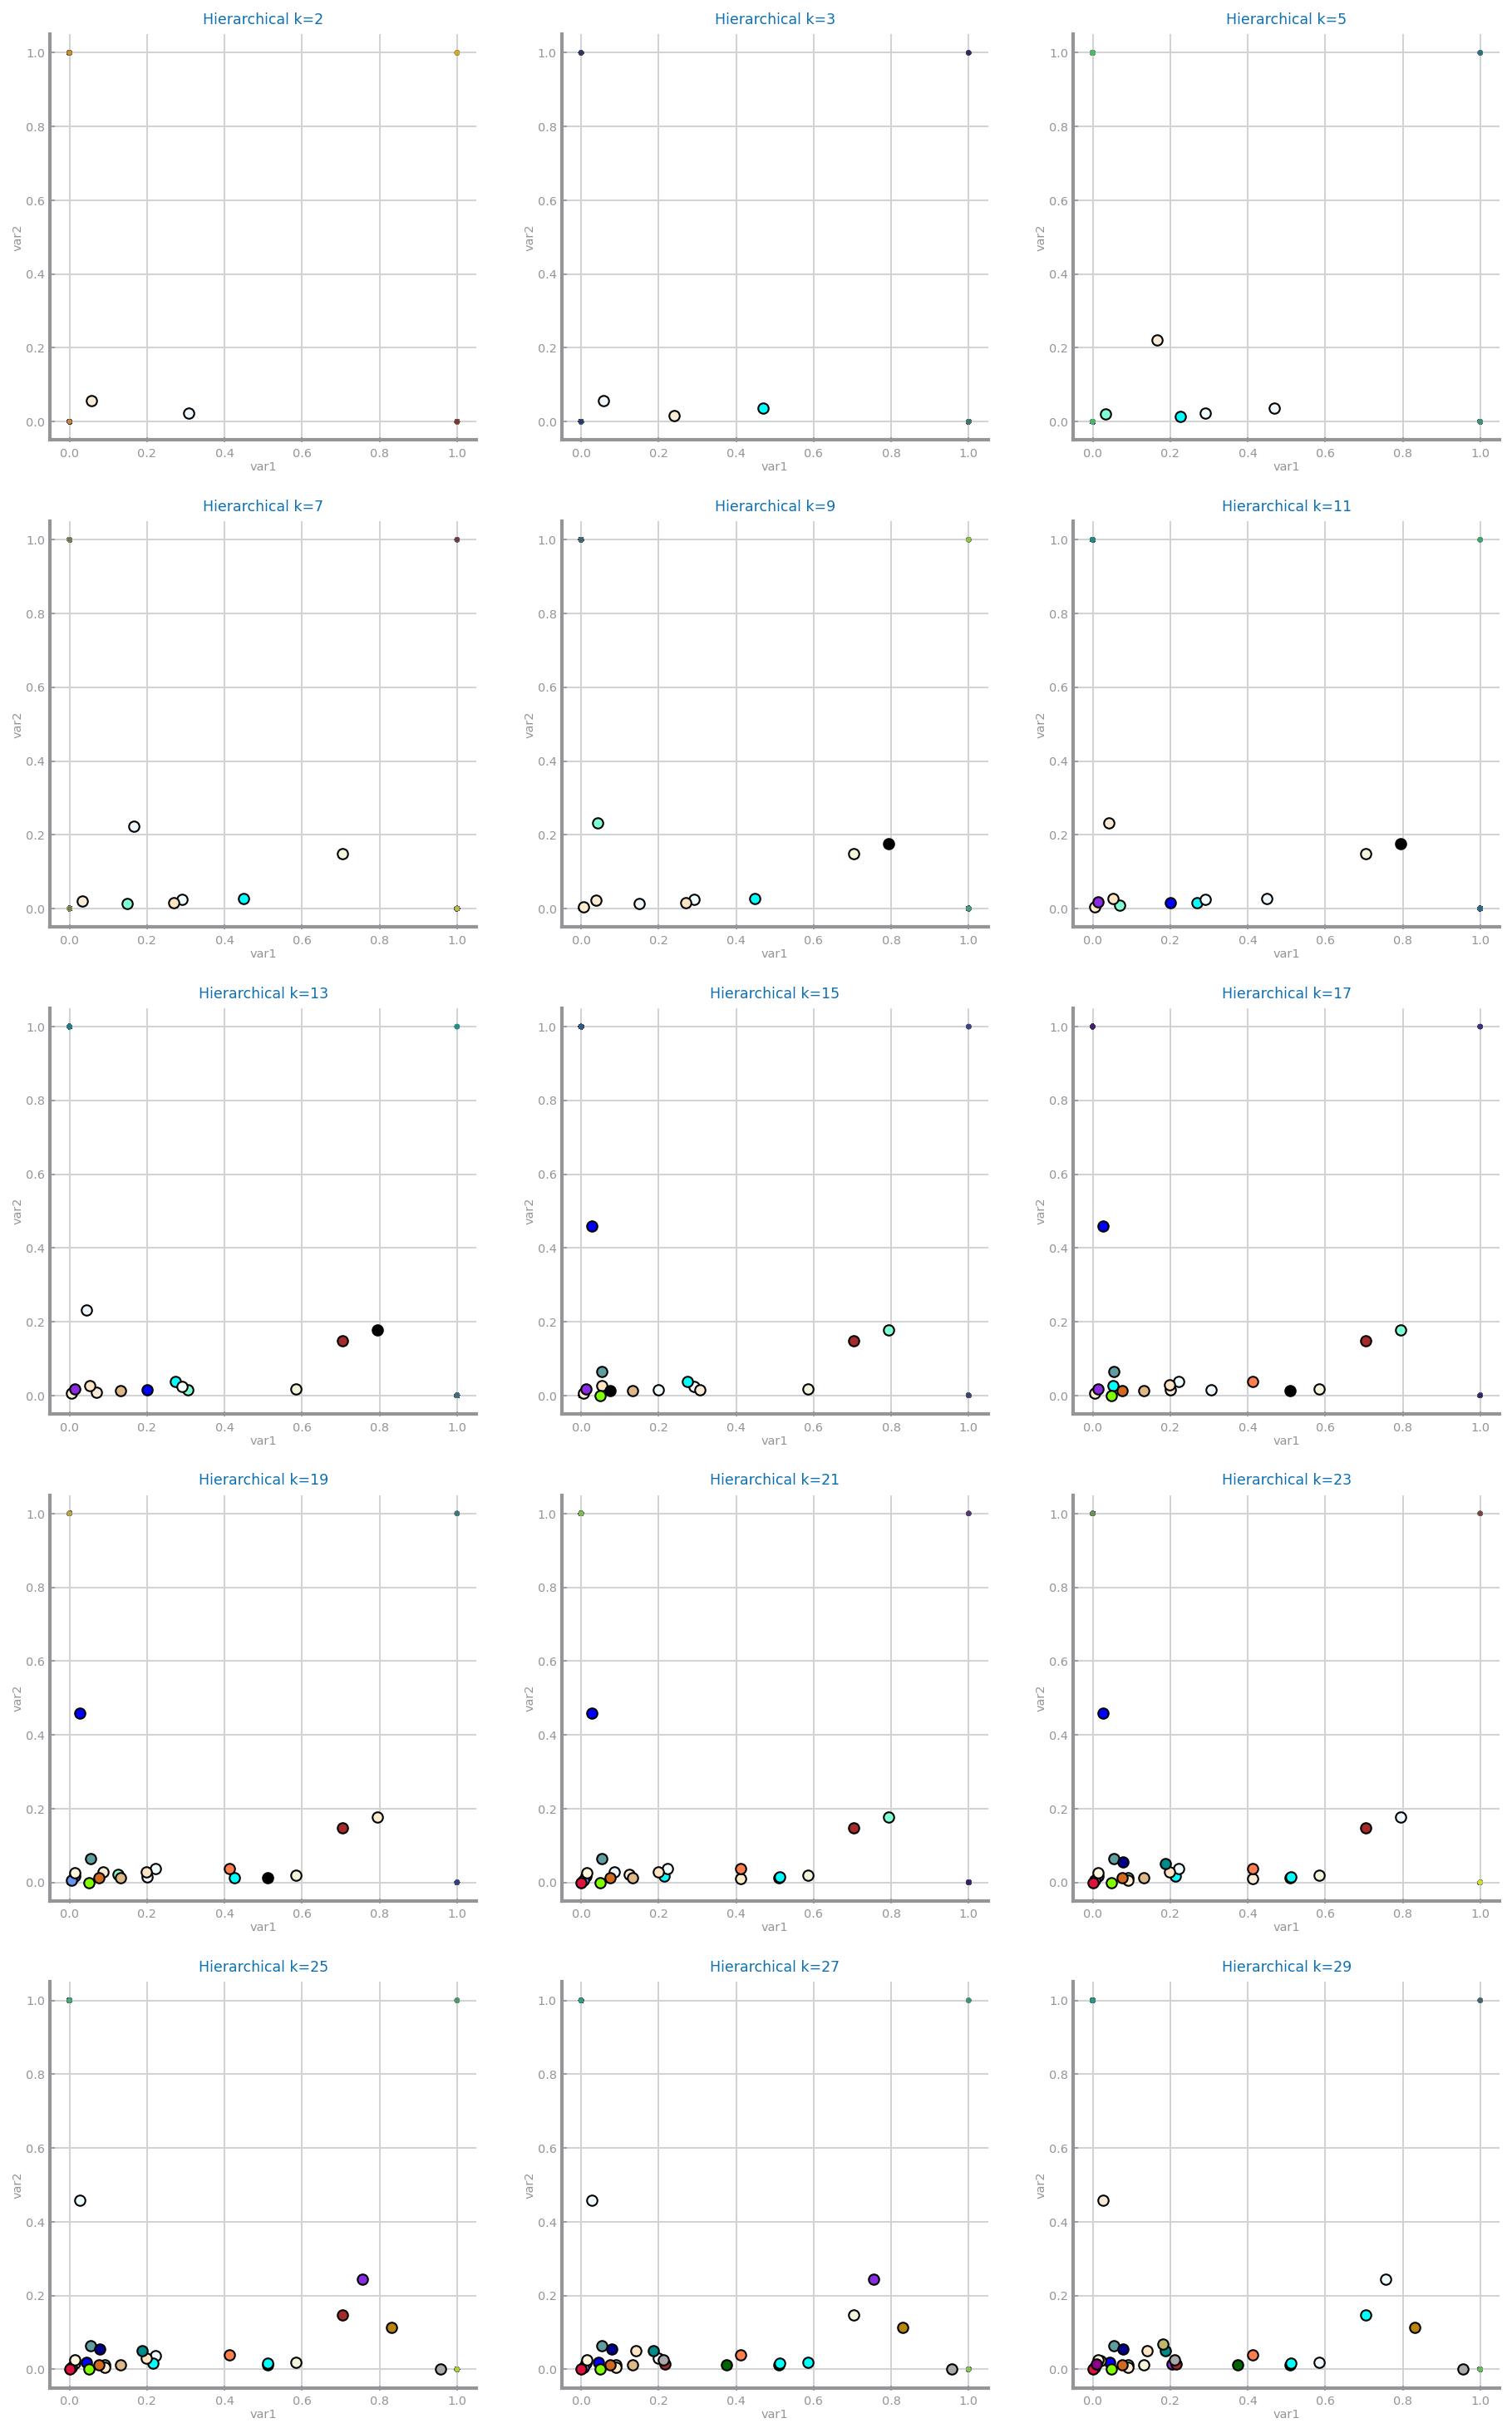

In [3]:
mse: list = []
sc: list = []
db: list = []

_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    print("On k={}".format(k))
    estimator = AgglomerativeClustering(n_clusters=k)
    estimator.fit(data)
    labels = estimator.labels_
    centers = ds.compute_centroids(data, labels)
    mse.append(ds.compute_mse(data.values, labels, centers))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    ds.plot_clusters(data, 1, 2, labels, centers, k,
                     f'Hierarchical k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

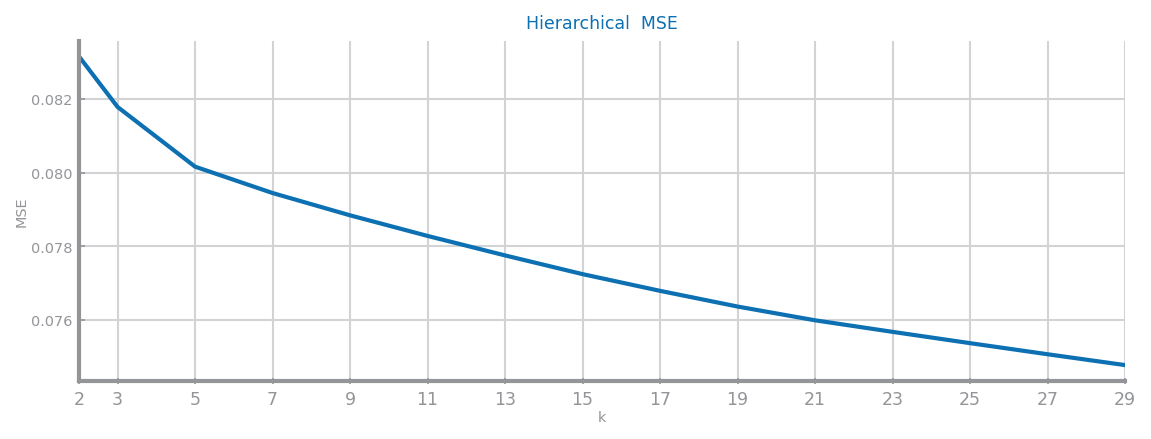

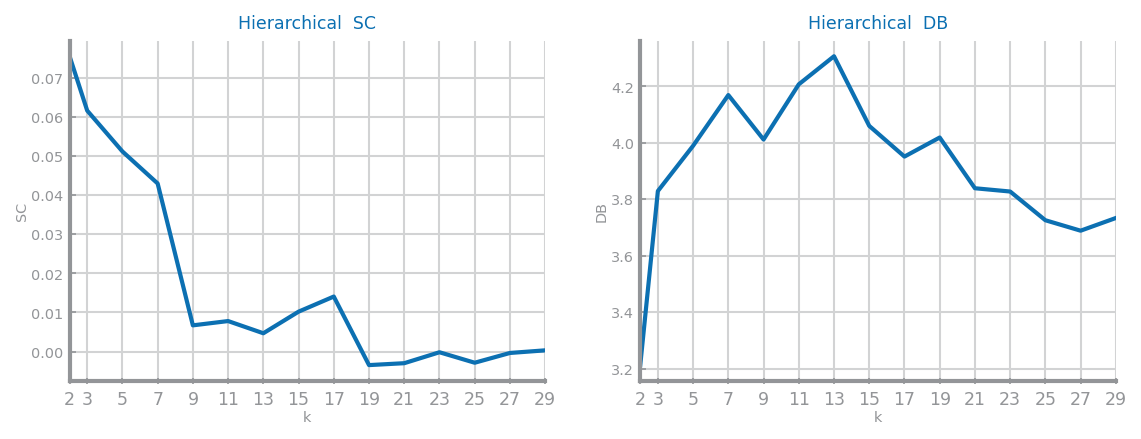

In [4]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='Hierarchical  MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='Hierarchical  SC', xlabel='k', ylabel='SC', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, db, title='Hierarchical  DB', xlabel='k', ylabel='DB', ax=ax[0, 1])
plt.show()

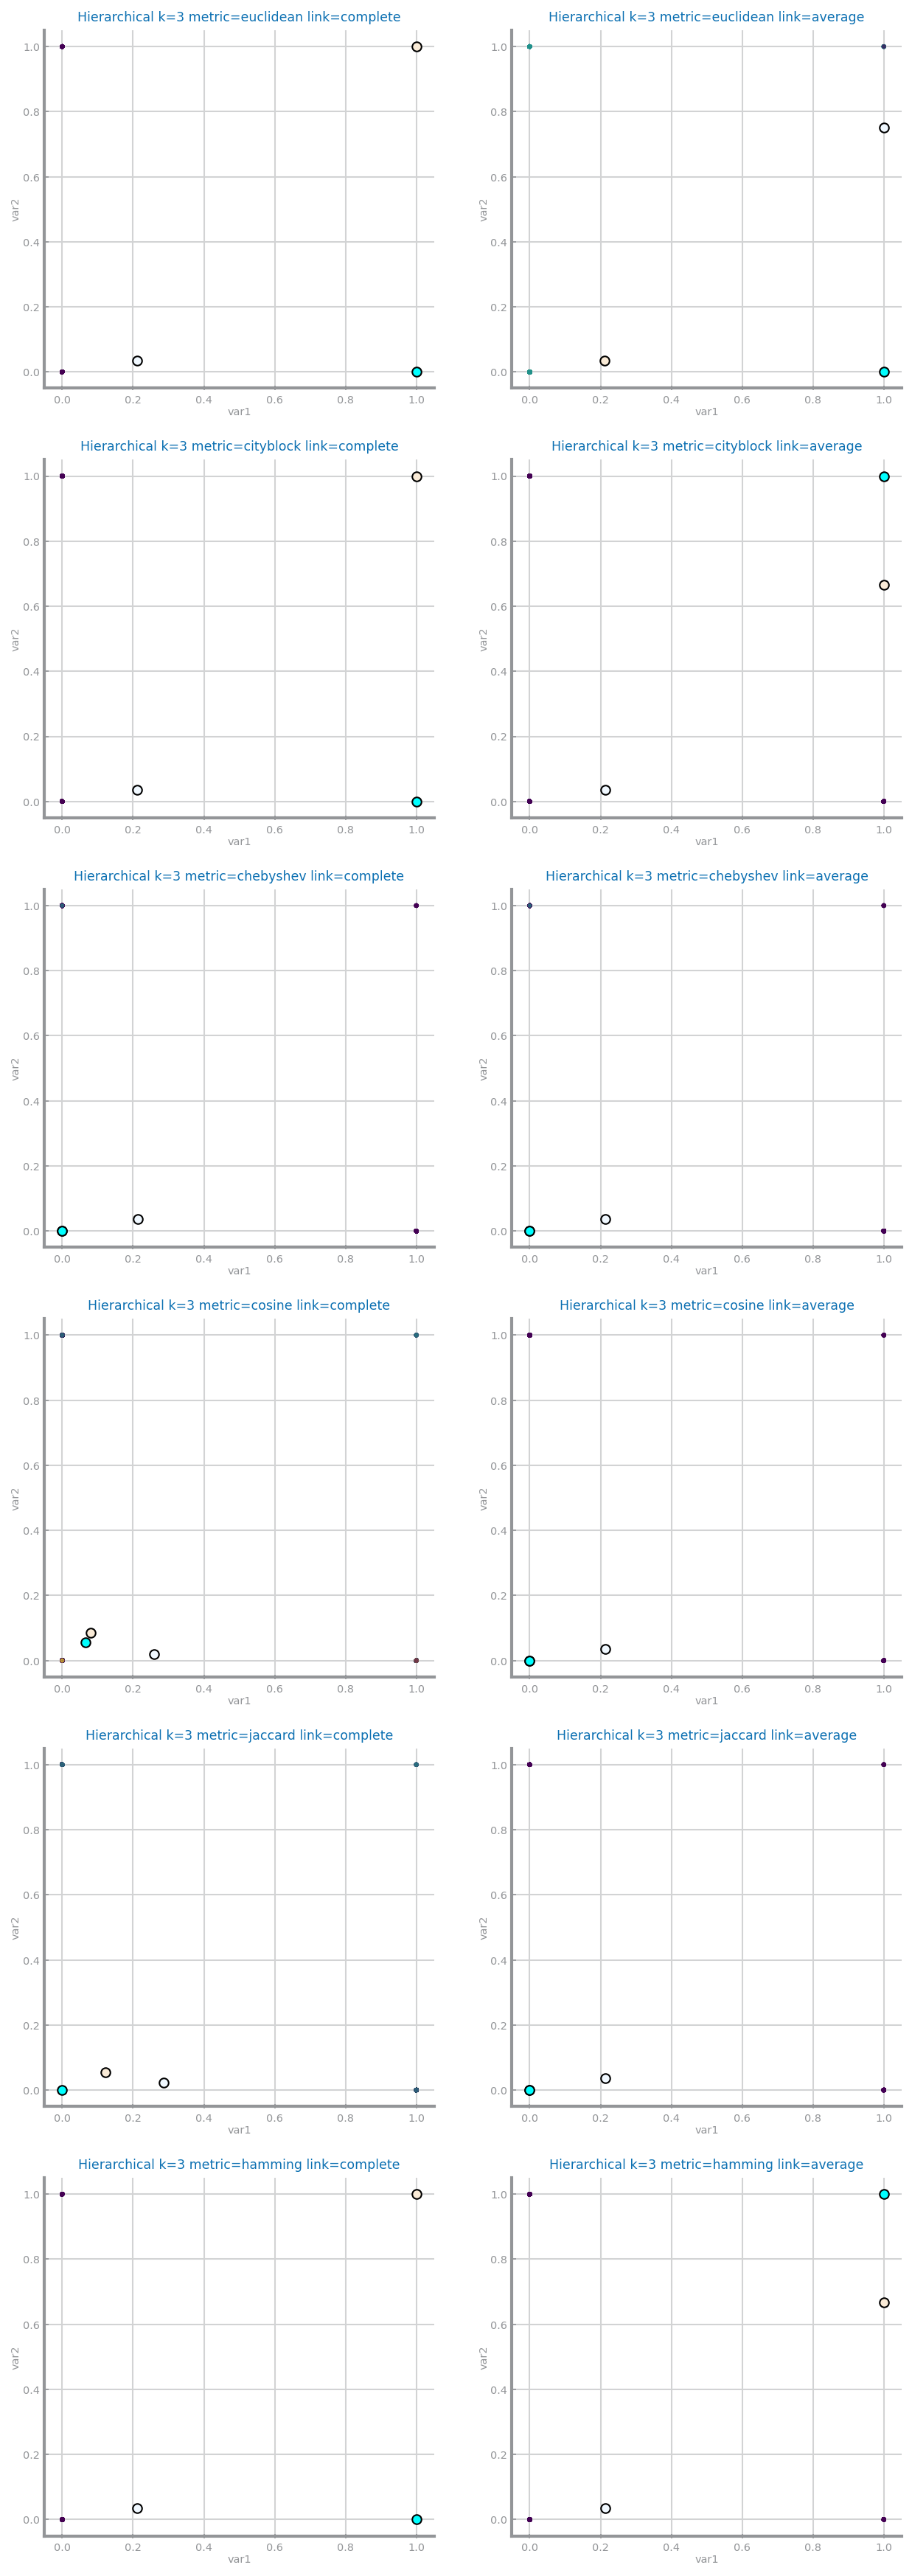

In [5]:
METRICS = ['euclidean', 'cityblock', 'chebyshev', 'cosine', 'jaccard', 'hamming']
LINKS = ['complete', 'average']
k = 3
values_mse = {}
values_sc = {}
values_db = {}

rows = len(METRICS)
cols = len(LINKS)
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
for i in range(len(METRICS)):
    mse: list = []
    sc: list = []
    db: list = []
    m = METRICS[i]
    for j in range(len(LINKS)):
        link = LINKS[j]
        estimator = AgglomerativeClustering(n_clusters=k, linkage=link, affinity=m )
        estimator.fit(data)
        labels = estimator.labels_
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))
        ds.plot_clusters(data, 1, 2, labels, centers, k,
                         f'Hierarchical k={k} metric={m} link={link}', ax=axs[i,j])
    values_mse[m] = mse
    values_sc[m] = sc
    values_db[m] = db
plt.show()

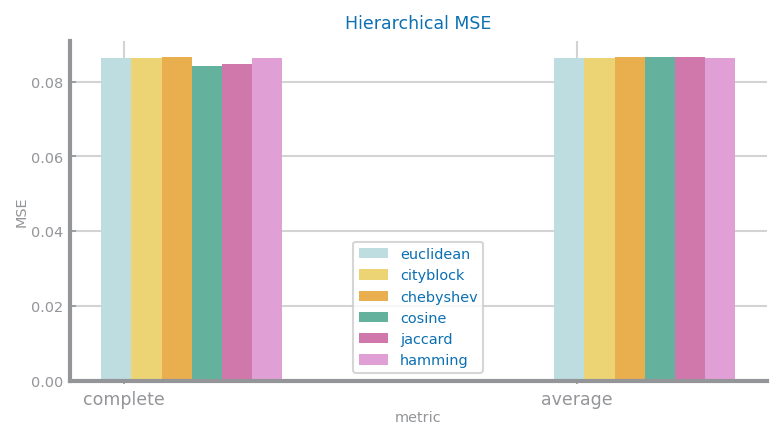

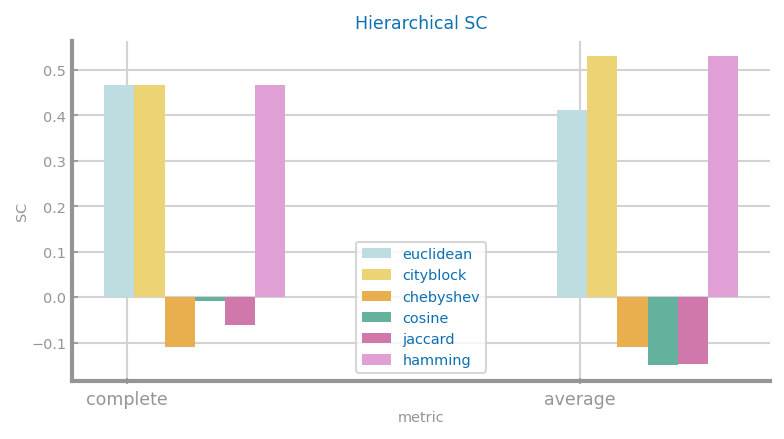

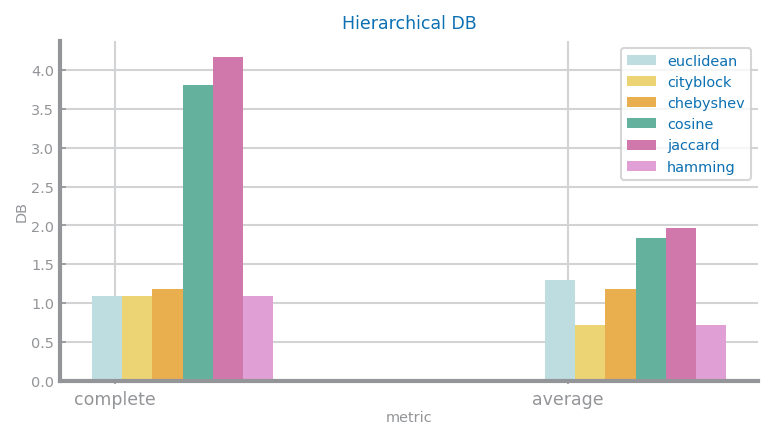

In [6]:
#_, ax = plt.subplots(2, 2, figsize=(10, 5), squeeze=False)
#ds.multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE', ax=ax[0, 0])
#ds.multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
#ds.multiple_bar_chart(LINKS, values_db, title=f'Hierarchical DB', xlabel='metric', ylabel='DB', ax=ax[1, 0], percentage=True)
#plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_db, title=f'Hierarchical DB', xlabel='metric', ylabel='DB')
plt.show()

## QSAR Dataset - Chi Feature Selection + Balancing

In [8]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_S_FChi_B.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

On k=2
On k=3
On k=5
On k=7
On k=9
On k=11
On k=13
On k=15
On k=17
On k=19
On k=21
On k=23
On k=25
On k=27
On k=29


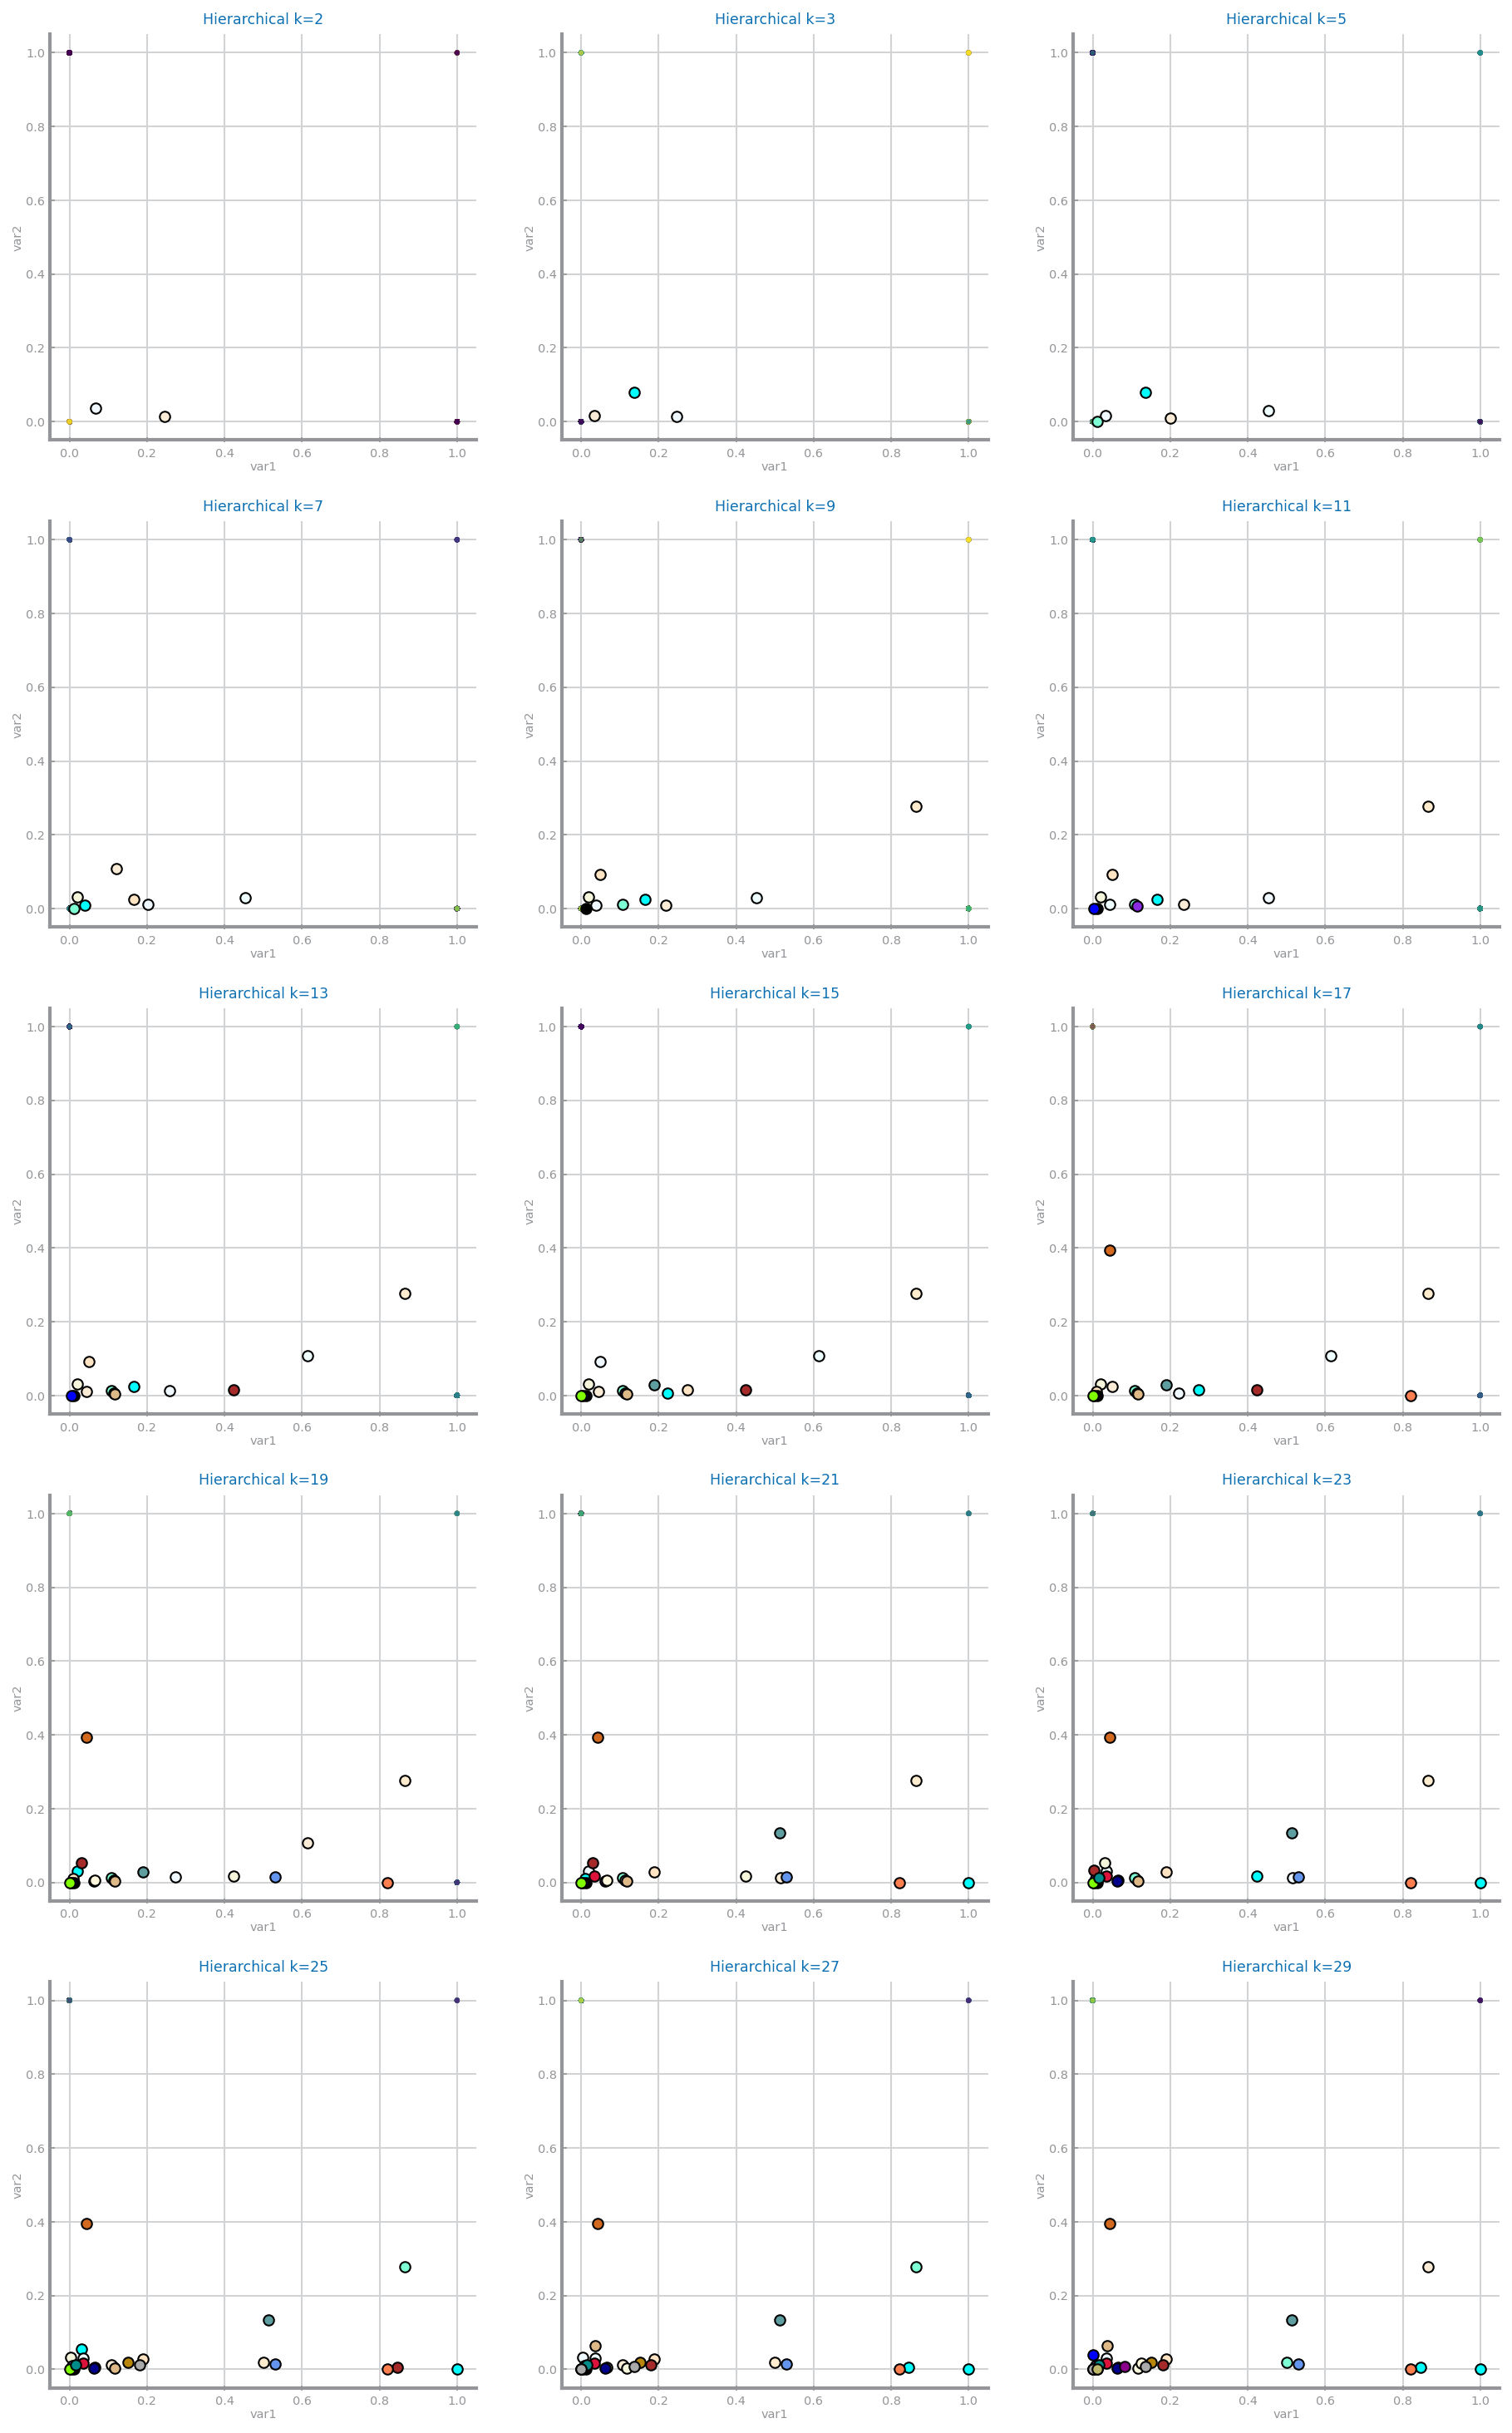

In [9]:
mse: list = []
sc: list = []
db: list = []

_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    print("On k={}".format(k))
    estimator = AgglomerativeClustering(n_clusters=k)
    estimator.fit(data)
    labels = estimator.labels_
    centers = ds.compute_centroids(data, labels)
    mse.append(ds.compute_mse(data.values, labels, centers))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    ds.plot_clusters(data, 1, 2, labels, centers, k,
                     f'Hierarchical k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

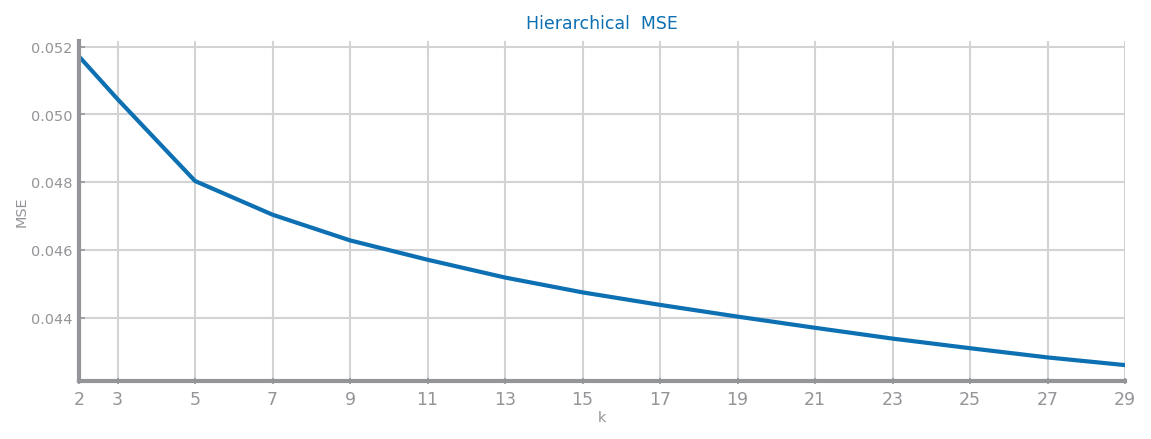

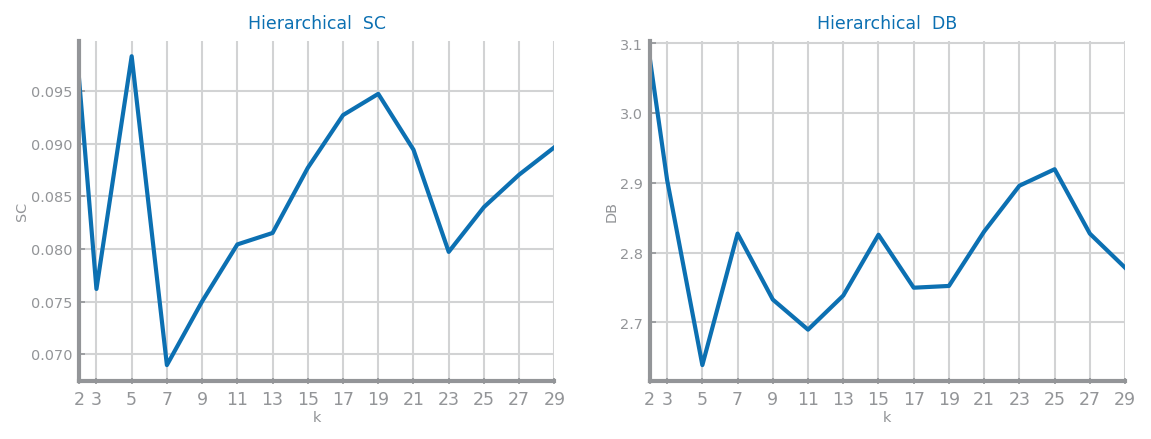

In [10]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='Hierarchical  MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='Hierarchical  SC', xlabel='k', ylabel='SC', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, db, title='Hierarchical  DB', xlabel='k', ylabel='DB', ax=ax[0, 1])
plt.show()

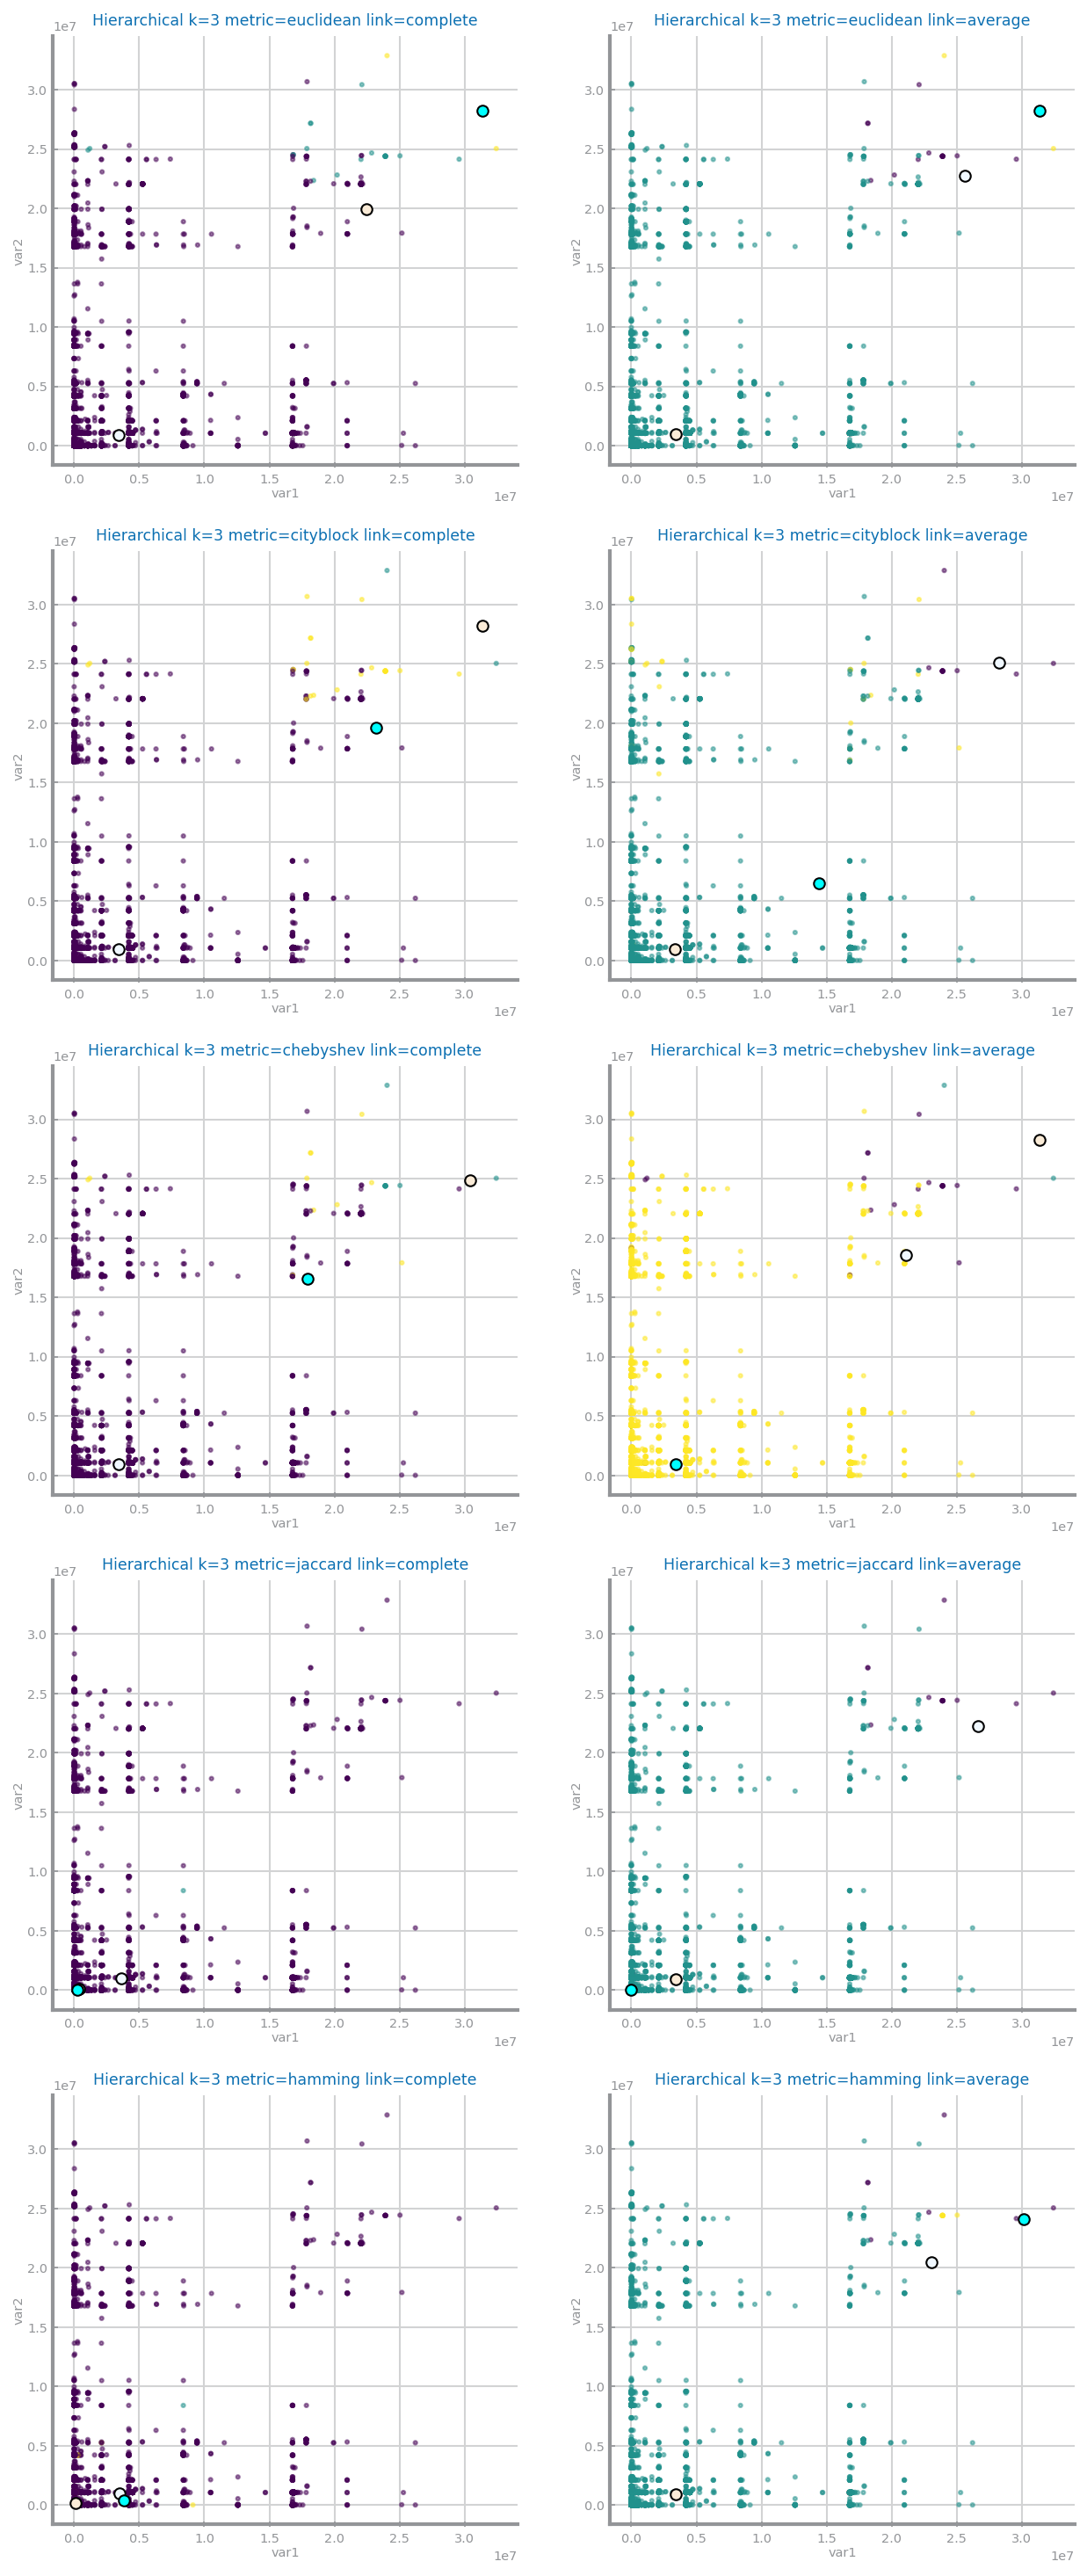

In [24]:
METRICS = ['euclidean', 'cityblock', 'chebyshev', 'jaccard', 'hamming']
LINKS = ['complete', 'average']
k = 3
values_mse = {}
values_sc = {}
values_db = {}

rows = len(METRICS)
cols = len(LINKS)
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
for i in range(len(METRICS)):
    mse: list = []
    sc: list = []
    db: list = []
    m = METRICS[i]
    for j in range(len(LINKS)):
        link = LINKS[j]
        estimator = AgglomerativeClustering(n_clusters=k, linkage=link, affinity=m )
        estimator.fit(data)
        labels = estimator.labels_
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))
        ds.plot_clusters(data, 1, 2, labels, centers, k,
                         f'Hierarchical k={k} metric={m} link={link}', ax=axs[i,j])
    values_mse[m] = mse
    values_sc[m] = sc
    values_db[m] = db
plt.show()

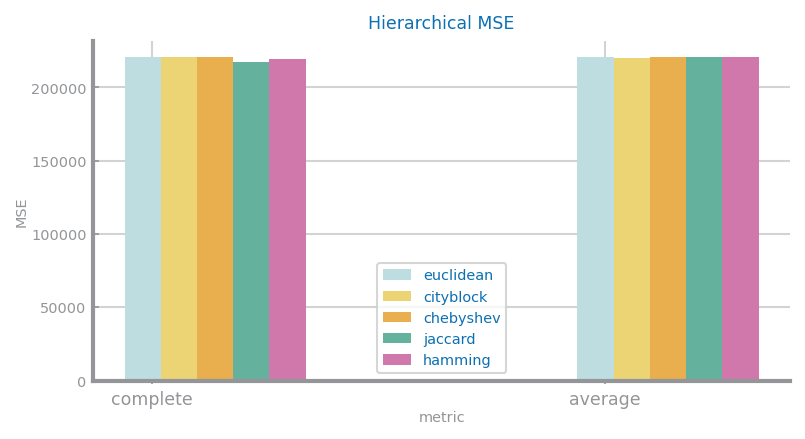

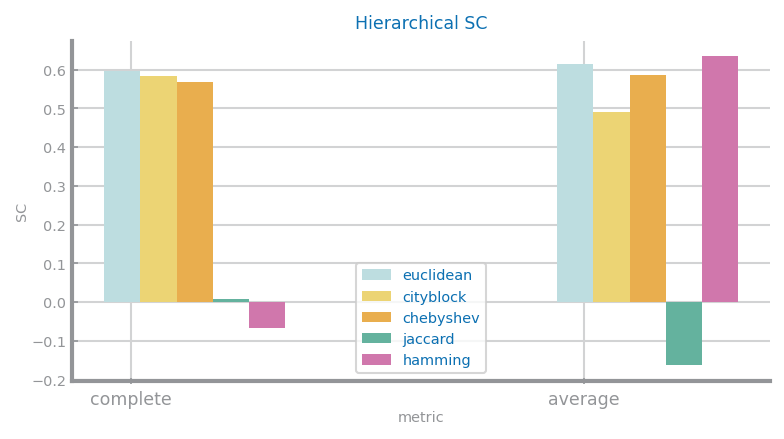

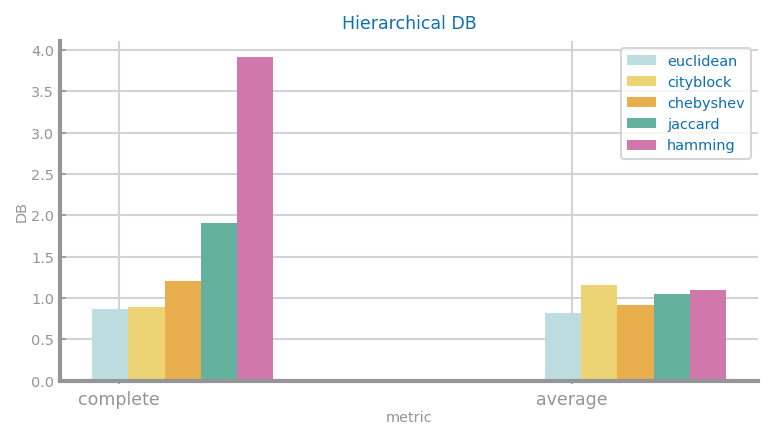

In [25]:
#_, ax = plt.subplots(2, 2, figsize=(10, 5), squeeze=False)
#ds.multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE', ax=ax[0, 0])
#ds.multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
#ds.multiple_bar_chart(LINKS, values_db, title=f'Hierarchical DB', xlabel='metric', ylabel='DB', ax=ax[1, 0], percentage=True)
#plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_db, title=f'Hierarchical DB', xlabel='metric', ylabel='DB')
plt.show()

## QSAR Dataset - Reduced Chi Balanced

In [13]:
def bin_to_integer(bitlist):
    """Returns the integer conversion from a number represented in a binary string"""
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)

    return out

In [19]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_B_reduced32.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

for index, row in data.iterrows():
    for col in data.columns:
        data.at[index,col] = bin_to_integer(row[col])

        
N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

In [20]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,33280,16384,288,8388608,0,784,4194306,8388608,4096,2097152,...,32768,1048600,128,0,0,65536,16384,532480,2105604,8388608
1,4227584,0,256,8388608,0,280,131074,0,0,2097152,...,32768,24,128,0,16384,65600,24576,532480,2367748,526336
2,33280,2048,256,8388608,0,33040,2,0,0,2097188,...,32768,24,0,0,0,65536,8404992,17309696,2109700,1572872
3,164352,0,256,8388608,0,272,2,4,0,2097152,...,34304,24,0,0,0,81928,16384,598016,2105604,525312
4,4608,16385,256,8519680,2,0,197634,4,0,2113536,...,262144,12582936,1,16384,0,65600,16384,32772,2105604,657408


On k=2
On k=3
On k=5
On k=7
On k=9
On k=11
On k=13
On k=15
On k=17
On k=19
On k=21
On k=23
On k=25
On k=27
On k=29


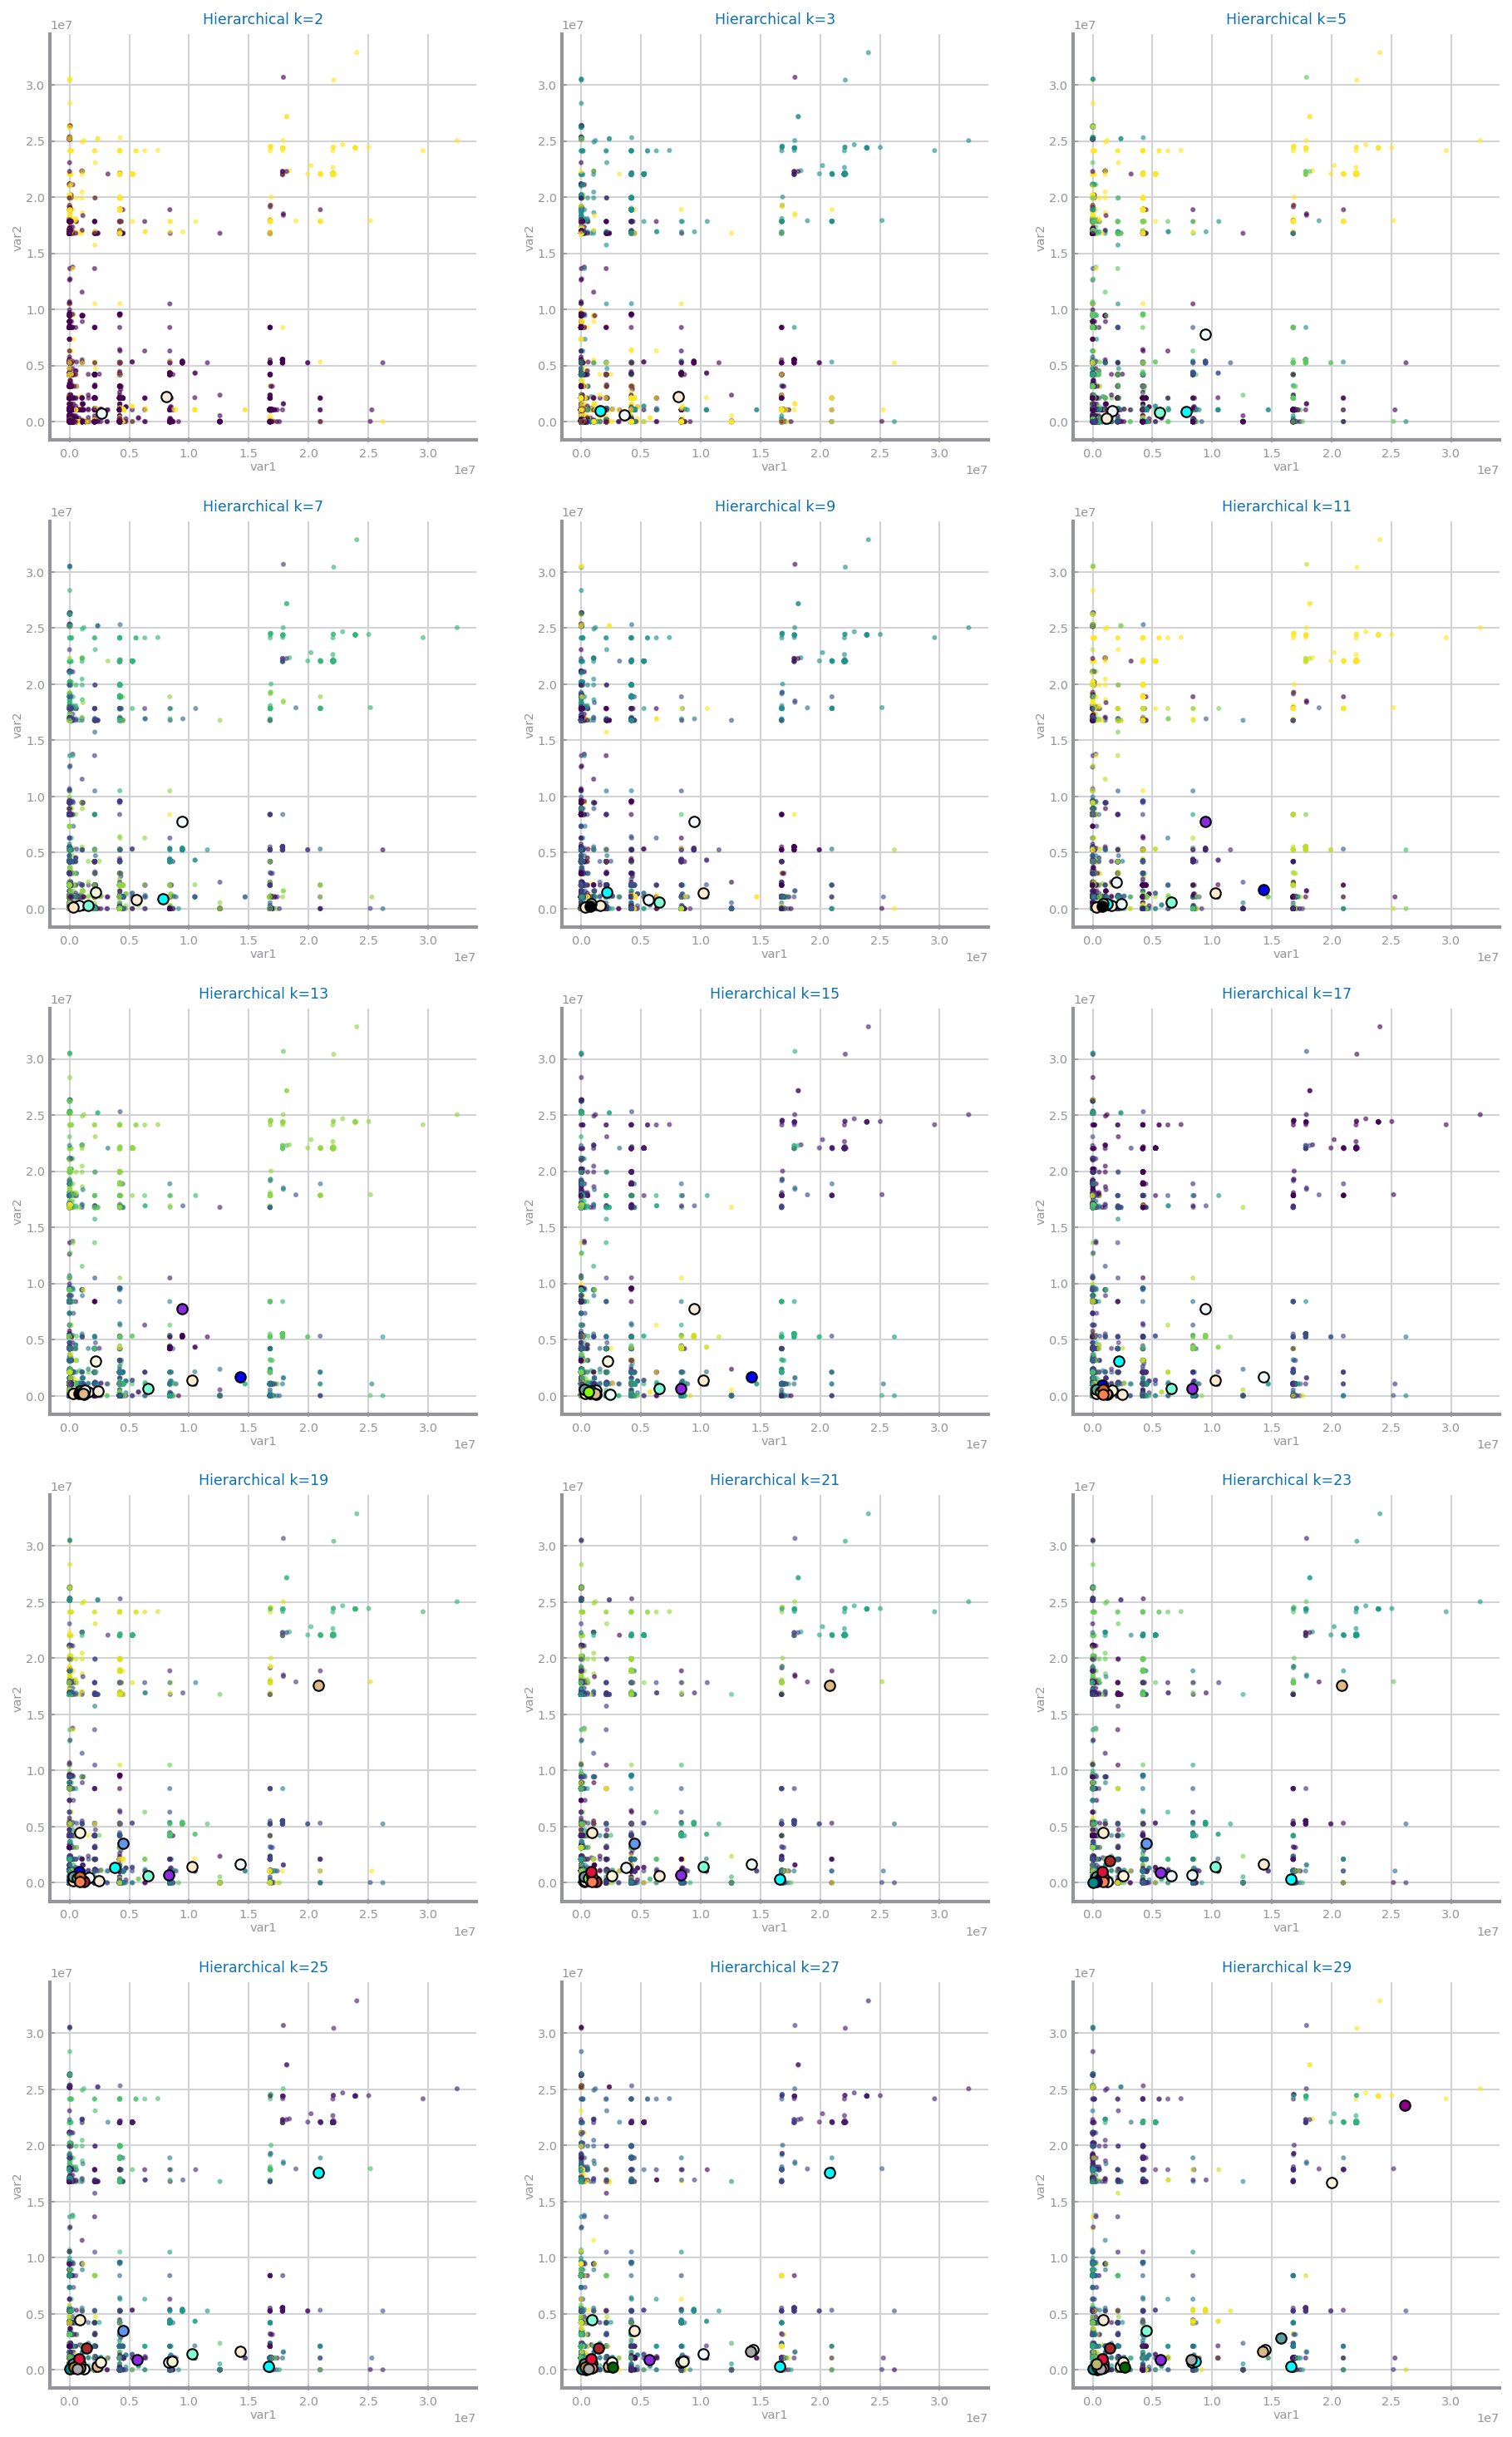

In [21]:
mse: list = []
sc: list = []
db: list = []

_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    print("On k={}".format(k))
    estimator = AgglomerativeClustering(n_clusters=k)
    estimator.fit(data)
    labels = estimator.labels_
    centers = ds.compute_centroids(data, labels)
    mse.append(ds.compute_mse(data.values, labels, centers))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    ds.plot_clusters(data, 1, 2, labels, centers, k,
                     f'Hierarchical k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

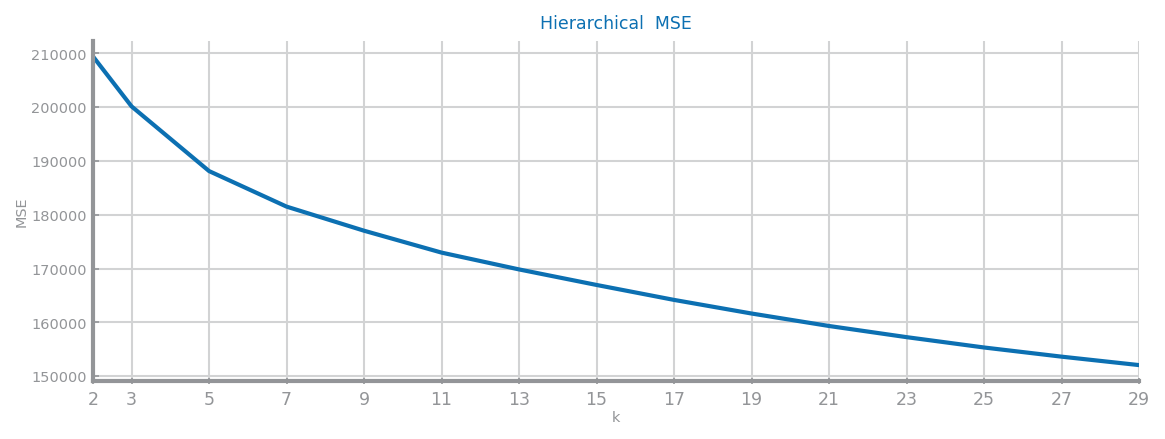

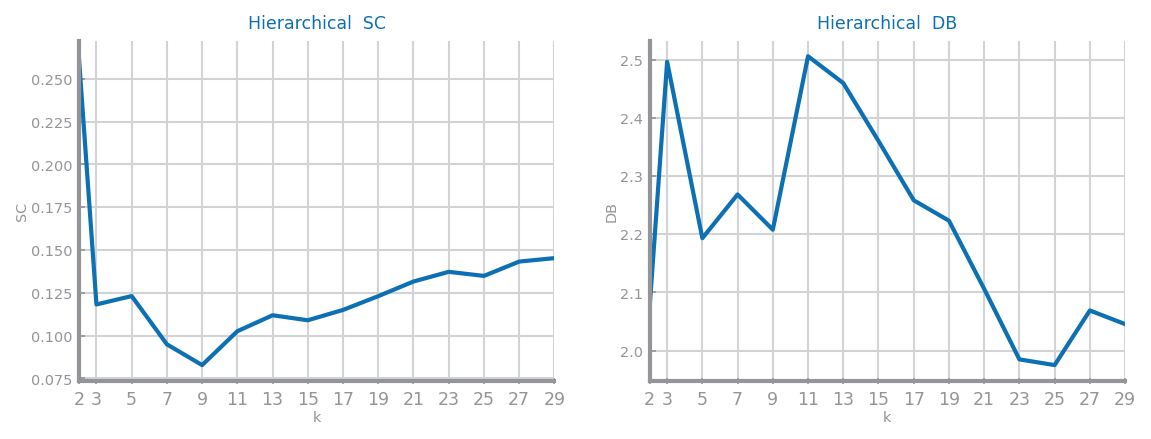

In [22]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='Hierarchical  MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='Hierarchical  SC', xlabel='k', ylabel='SC', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, db, title='Hierarchical  DB', xlabel='k', ylabel='DB', ax=ax[0, 1])
plt.show()

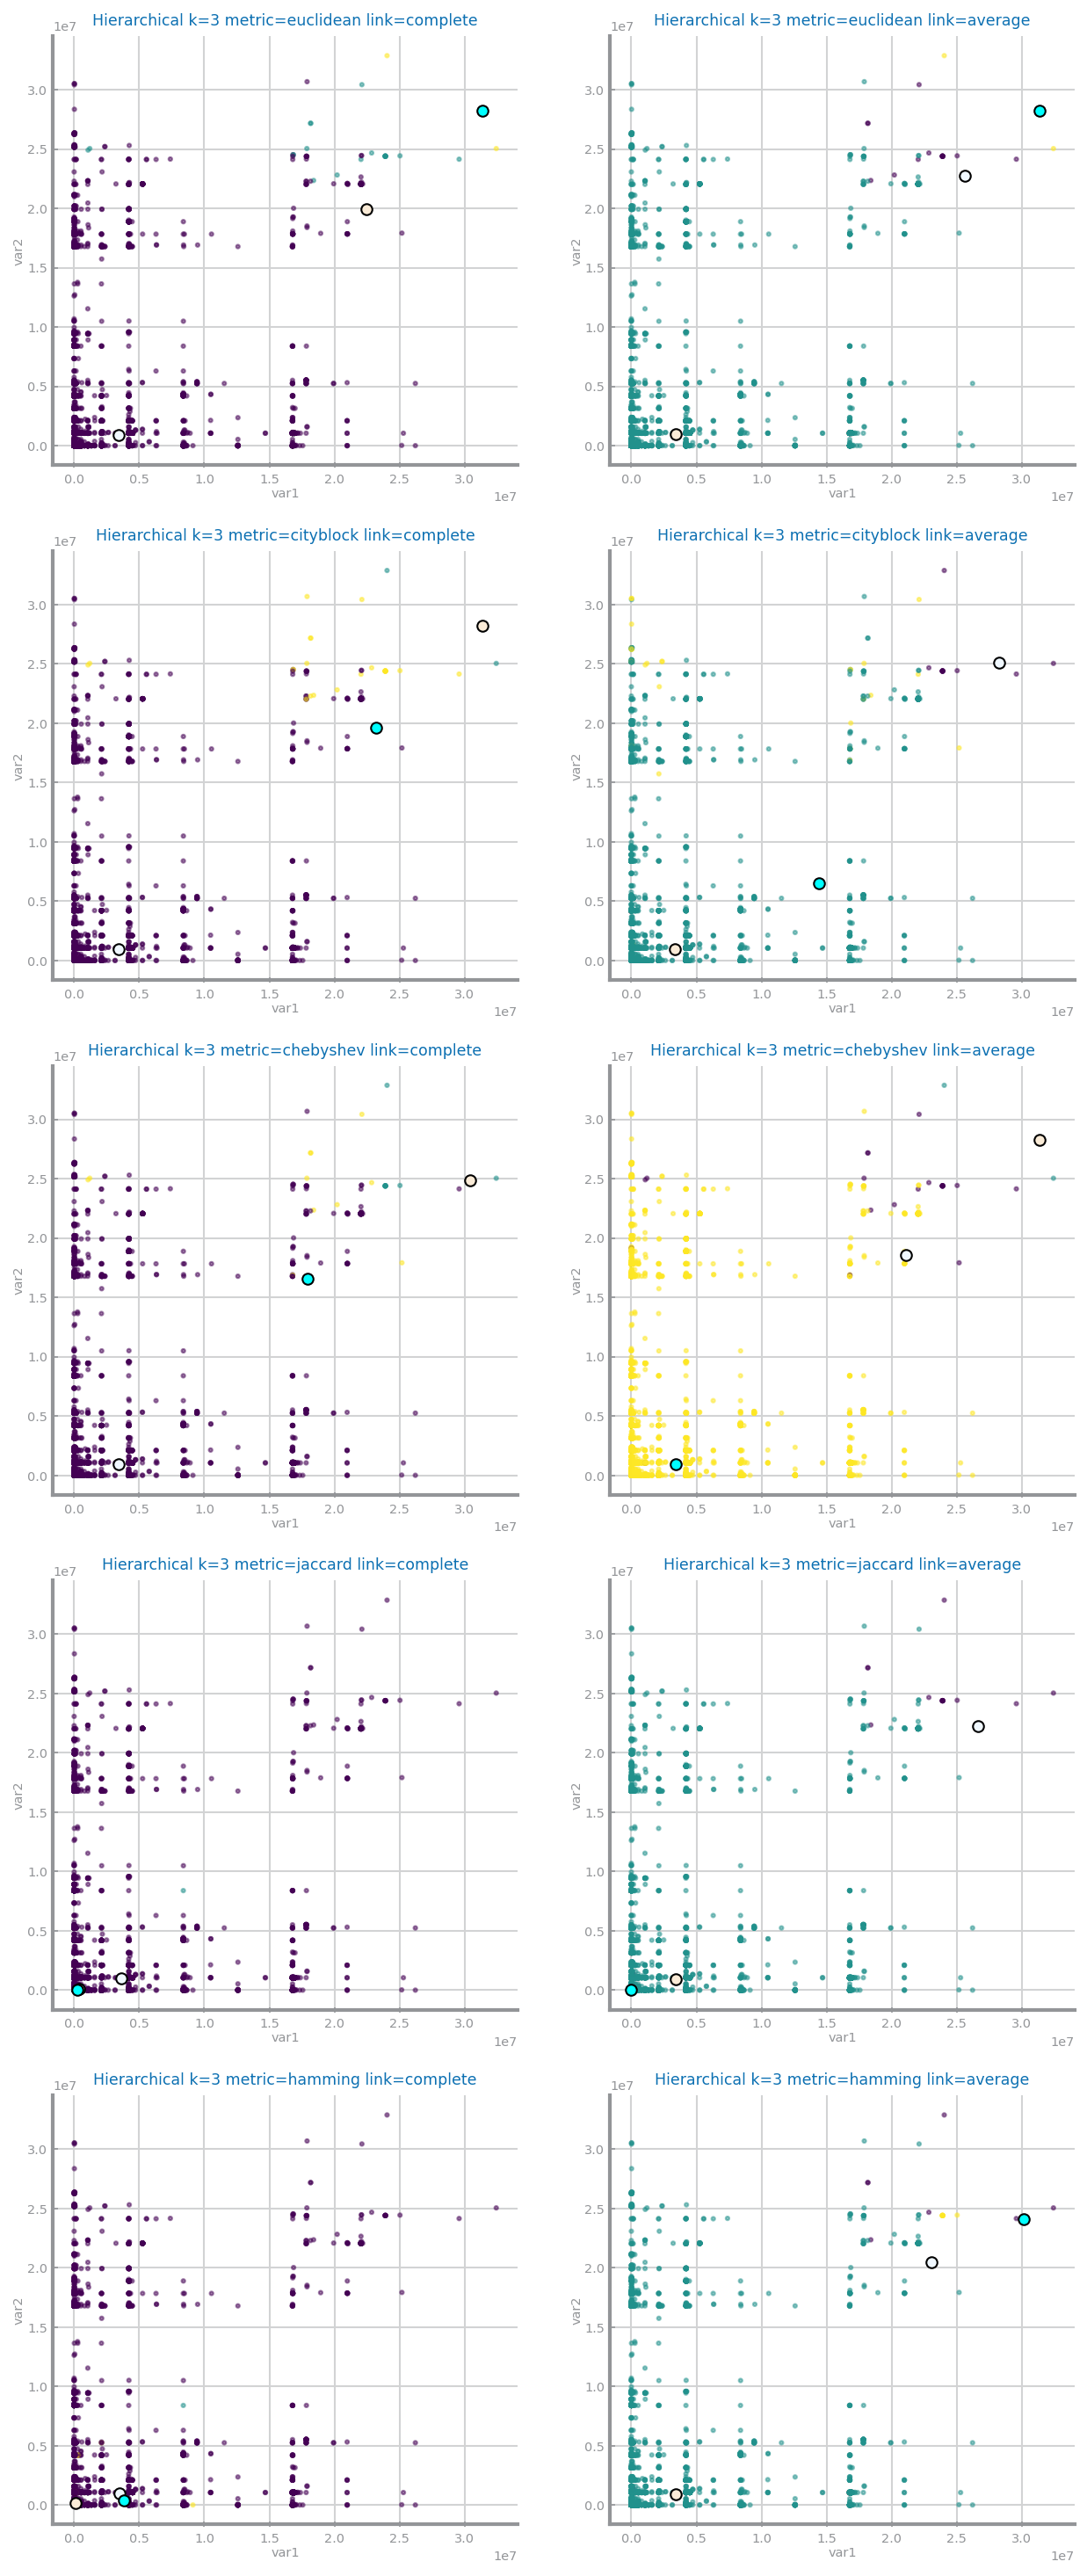

In [26]:
METRICS = ['euclidean', 'cityblock', 'chebyshev', 'jaccard', 'hamming']
LINKS = ['complete', 'average']
k = 3
values_mse = {}
values_sc = {}
values_db = {}

rows = len(METRICS)
cols = len(LINKS)
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
for i in range(len(METRICS)):
    mse: list = []
    sc: list = []
    db: list = []
    m = METRICS[i]
    for j in range(len(LINKS)):
        link = LINKS[j]
        estimator = AgglomerativeClustering(n_clusters=k, linkage=link, affinity=m )
        estimator.fit(data)
        labels = estimator.labels_
        centers = ds.compute_centroids(data, labels)
        mse.append(ds.compute_mse(data.values, labels, centers))
        sc.append(silhouette_score(data, labels))
        db.append(davies_bouldin_score(data, labels))
        ds.plot_clusters(data, 1, 2, labels, centers, k,
                         f'Hierarchical k={k} metric={m} link={link}', ax=axs[i,j])
    values_mse[m] = mse
    values_sc[m] = sc
    values_db[m] = db
plt.show()

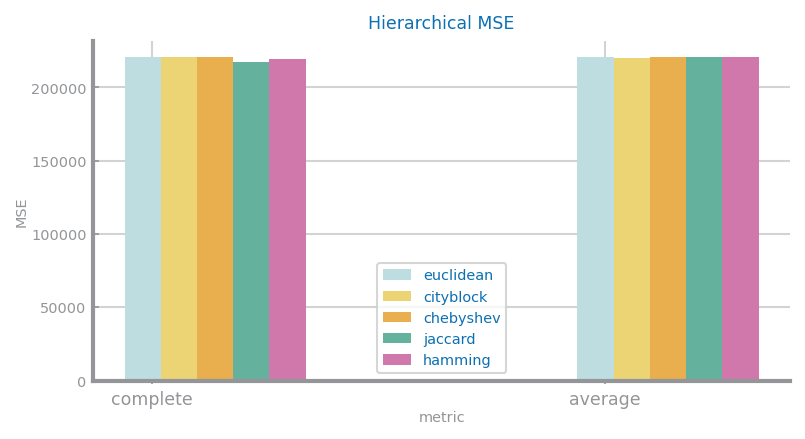

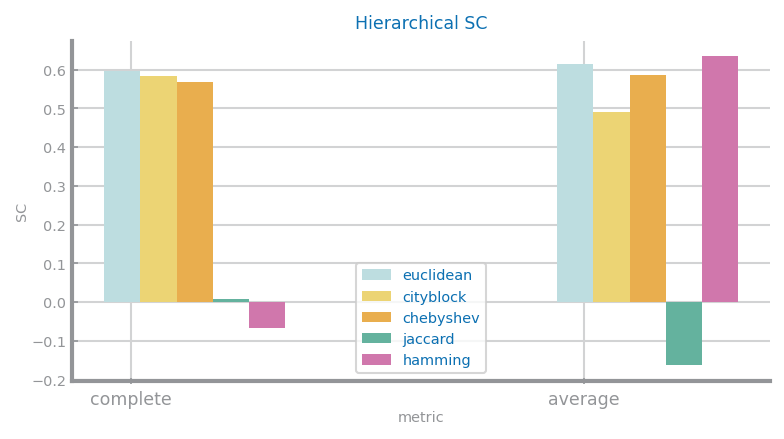

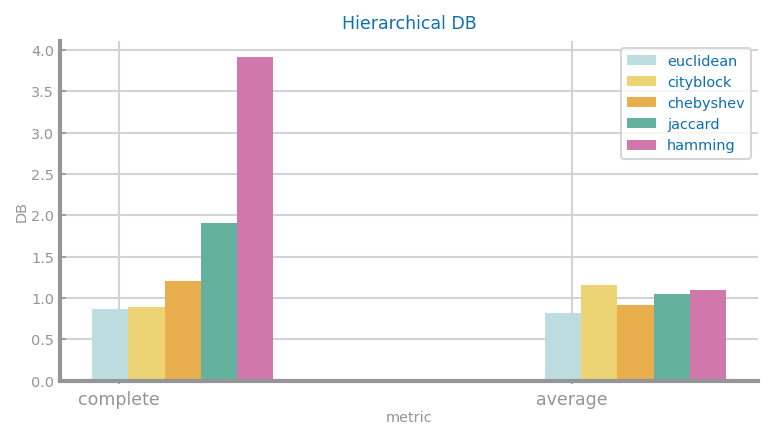

In [27]:
#_, ax = plt.subplots(2, 2, figsize=(10, 5), squeeze=False)
#ds.multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE', ax=ax[0, 0])
#ds.multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC', ax=ax[0, 1], percentage=True)
#ds.multiple_bar_chart(LINKS, values_db, title=f'Hierarchical DB', xlabel='metric', ylabel='DB', ax=ax[1, 0], percentage=True)
#plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_mse, title=f'Hierarchical MSE', xlabel='metric', ylabel='MSE')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_sc, title=f'Hierarchical SC', xlabel='metric', ylabel='SC')
plt.show()

fig = plt.figure(figsize=(6,3))
ds.multiple_bar_chart(LINKS, values_db, title=f'Hierarchical DB', xlabel='metric', ylabel='DB')
plt.show()